In [166]:
import pandas as pd;
import numpy as np;

covid = pd.read_csv('./models/google_new.csv');
covid

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
...,...,...,...,...,...,...,...,...,...,...,...
812,ZA,South Africa,2020-04-01,-42.446,-37.600,34.916,-69.728,-77.371,-72.935,1380,5
813,ZA,South Africa,2020-04-02,-40.523,-38.226,36.550,-69.577,-77.874,-73.331,1462,5
814,ZA,South Africa,2020-04-03,-42.107,-43.271,38.379,-71.513,-77.944,-72.745,1505,9
815,ZA,South Africa,2020-04-04,-51.515,-57.252,26.499,-76.589,-77.026,-55.095,1585,9


In [167]:
#List of all countries in dataset
countries = covid['country'].unique()

#dict with populations to fill
population = {'Argentina' : 44490000, 'Australia' : 24990000, 'Brazil' : 209500000, 'Canada' : 37590000, 'Germany' : 83020000, 'Spain' : 46940000, 
              'France' : 66990000, 'United Kingdom' : 66650000, 'Indonesia' : 267700000, 'India' : 1353000000, 'Italy' : 60360000, 'Japan' : 126500000, 
              'South Korea' : 51640000, 'Mexico' : 126200000, 'Saudi Arabia' : 33700000, 'Sweden' : 10230000, 'Turkey' : 82000000, 'US' : 328200000, 
              'South Africa' : 57780000}

for country in countries:
    covid.loc[covid['country'] == country, 'population'] = population[country];
    covid.loc[:, 'cases_per_thousand'] = covid['total_cases']/(covid['population']/1000000.0);
    
covid.head()

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities,population,cases_per_thousand
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0,44490000.0,0.0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0,44490000.0,0.0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0,44490000.0,0.0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0,44490000.0,0.0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0,44490000.0,0.0


In [168]:
%matplotlib inline

import matplotlib.pyplot as plt;
import seaborn as sb;

# kind of works but not really
# strange = sb.pairplot(usa.dropna(), hue='date', diag_kind='hist');
# strange.savefig("./models/output.png")


# plt.figure(figsize=(10, 10));

# for column_index, column in enumerate(usa.columns):
#    usa[['date',column]].set_index('date').plot()

In [169]:
#usa.loc[0, 'previous_cases'] = 0
#for i in range(1, len(usa)):
#    usa.loc[i, 'previous_cases'] = usa.loc[i - 1, 'cases_per_thousand']
    
#usa['previous_cases'] = usa['previous_cases']
#usa

In [170]:
# train and test sets

from sklearn.model_selection import train_test_split

testing = covid.drop(covid.loc[covid.country=='Brazil'].index);
testing = testing.drop(columns=['country', 'fatalities', 'date', 'iso', 'population', 'total_cases'])
testing.reset_index(drop=True, inplace=True)

train , test = train_test_split(testing, test_size=0.25)

x_train = train.drop('cases_per_thousand', axis=1)
y_train = train['cases_per_thousand']

x_test = test.drop('cases_per_thousand', axis = 1)
y_test = test['cases_per_thousand']

x_test

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces
643,-5.387,57.463,6.272,-26.481,-31.666,-16.079
216,3.234,45.388,3.125,2.579,-1.184,-15.241
608,3.562,8.137,-0.152,7.674,4.534,0.197
652,10.017,35.042,-0.184,8.818,3.416,6.793
347,-0.197,1.497,-0.683,0.358,2.629,3.250
...,...,...,...,...,...,...
470,5.565,25.704,7.143,-14.486,-24.521,-10.564
354,5.344,0.892,0.001,0.456,2.705,6.921
684,-26.644,-46.272,22.697,-61.981,-64.110,-49.667
278,7.342,0.710,2.431,-10.119,-15.149,-2.177


In [171]:
# preprocessing --> scaling
# all between [0, 1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

x_test

,0,1,2,3,4,5
0,0.656684,0.924589,0.225483,0.635769,0.557942,0.634728
1,0.730474,0.848815,0.153944,0.904788,0.854803,0.643723
2,0.733281,0.615052,0.079450,0.951954,0.910490,0.809422
3,0.788532,0.783890,0.078722,0.962545,0.899602,0.880218
4,0.701107,0.573384,0.067379,0.884227,0.891937,0.842190
...,...,...,...,...,...,...
189,0.750426,0.725291,0.245283,0.746811,0.627526,0.693922
190,0.748534,0.569587,0.082928,0.885135,0.892677,0.881592
191,0.474737,0.273617,0.598863,0.307132,0.241973,0.274222
192,0.765636,0.568445,0.138168,0.787238,0.718799,0.783941


RMSE value for k=  1 is: 248.1997870960385
RMSE value for k=  2 is: 225.79528971623427
RMSE value for k=  3 is: 226.23433610355988
RMSE value for k=  4 is: 247.77198370710013
RMSE value for k=  5 is: 257.8128798499244
RMSE value for k=  6 is: 268.1246706339029
RMSE value for k=  7 is: 282.1365933458391
RMSE value for k=  8 is: 286.2177453015564
RMSE value for k=  9 is: 294.495308026378
RMSE value for k=  10 is: 301.95833665122103
RMSE value for k=  11 is: 308.956322355872
RMSE value for k=  12 is: 308.48713843465816
RMSE value for k=  13 is: 312.7073826873826
RMSE value for k=  14 is: 308.7203972993637
RMSE value for k=  15 is: 308.0454882362596
RMSE value for k=  16 is: 312.8556522150751
RMSE value for k=  17 is: 315.9667408197202
RMSE value for k=  18 is: 316.90624447667204
RMSE value for k=  19 is: 317.3770552321813
RMSE value for k=  20 is: 319.4631228937576


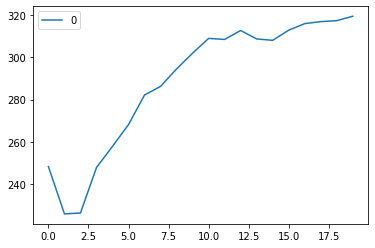

In [172]:
# best K value

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

# Root Mean Squared Error 
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val)
curve.plot()

In [173]:
# for this training set, best k value is 2
# this is another (better) way of getting the right k value

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_
model.score(x_test, y_test)

0.7391287626826066

In [174]:
spain = covid.loc[covid['country'] == 'Brazil']
spain= spain.drop(columns=['country', 'fatalities', 'date', 'iso', 'population', 'total_cases'])
spain.reset_index(drop=True, inplace=True)

#spain.loc[0, 'previous_cases'] = 0
#for i in range(1, len(spain)):
#    spain.loc[i, 'previous_cases'] = spain.loc[i - 1, 'cases_per_thousand']
    
#spain['previous_cases'] = spain['previous_cases']
solution = spain
spain = spain.drop(['cases_per_thousand'], axis=1)

spain_scaled = scaler.fit_transform(spain)
spain = pd.DataFrame(spain_scaled)

predict = model.predict(spain)
spain['cases_per_thousand'] = predict
spain

,0,1,2,3,4,5,cases_per_thousand
0,0.882114,0.746462,0.108191,0.939527,0.857954,0.708313,3.214388
1,0.600910,1.000000,0.404788,0.715920,0.474651,0.186086,4.434783
2,0.141760,0.874863,0.467240,0.501371,0.369947,0.000000,512.065388
3,0.513805,0.463950,0.308466,0.663072,0.600429,0.518235,4.059586
4,0.768568,0.446555,0.111945,0.783002,0.845823,0.861507,12.545018
5,0.803710,0.404545,0.119414,0.823183,0.853462,0.899271,12.545018
6,0.836057,0.362667,0.200436,0.854821,0.800379,0.801131,7.542570
7,0.798431,0.280538,0.259497,0.774178,0.702327,0.722159,13.905115
8,0.749953,0.343291,0.068952,0.809218,0.902791,0.977510,2.140856
9,0.776164,0.376715,0.055145,0.829180,0.909957,0.921810,2.140856
